import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from collections import Counter
import xgboost

Read the dataset

In [ ]:
data=pd.read_csv('traffic volume.csv')

In [ ]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


handling missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [ ]:
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [ ]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

In [ ]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [ ]:
data['weather'].fillna('Clouds',inplace=True)

Handling data and time column

In [ ]:
data[["day","month","year"]]=data["date"].str.split("-",expand=True)

In [ ]:

data[["hours","minutes","seconds"]]=data["Time"].str.split(":",expand=True)

In [ ]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [ ]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


checking descriptive statistics

In [ ]:
data.describe()

,temp,rain,snow,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.336338,44.789133,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1193.000000
50%,282.429000,0.000000,0.000000,3380.000000
75%,291.800000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


checking correlation

In [ ]:
cor=data.corr()

<ipython-input-171-410fe4458127>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


In [ ]:
cor

,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


<Axes: >

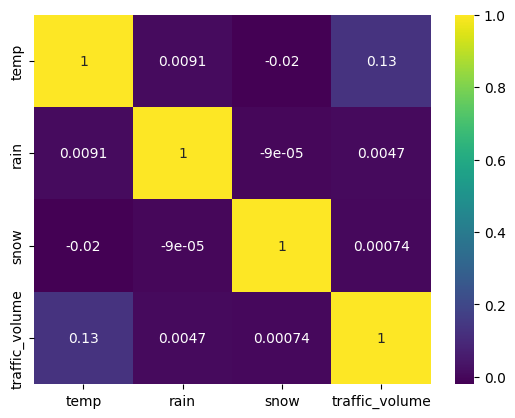

In [ ]:

sns.heatmap(cor,annot=True,cmap="viridis")

In [ ]:

x=data.iloc[:,4:6]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.weather=le.fit_transform(x.weather)
x.head()

,weather,traffic_volume
0,1,5545
1,1,4516
2,1,4767
3,1,5026
4,1,4918


In [ ]:
print(Counter(x['weather']))

Counter({1: 15193, 0: 13383, 5: 5942, 6: 5665, 8: 2875, 2: 1818, 4: 1359, 10: 1033, 3: 912, 7: 20, 9: 4})


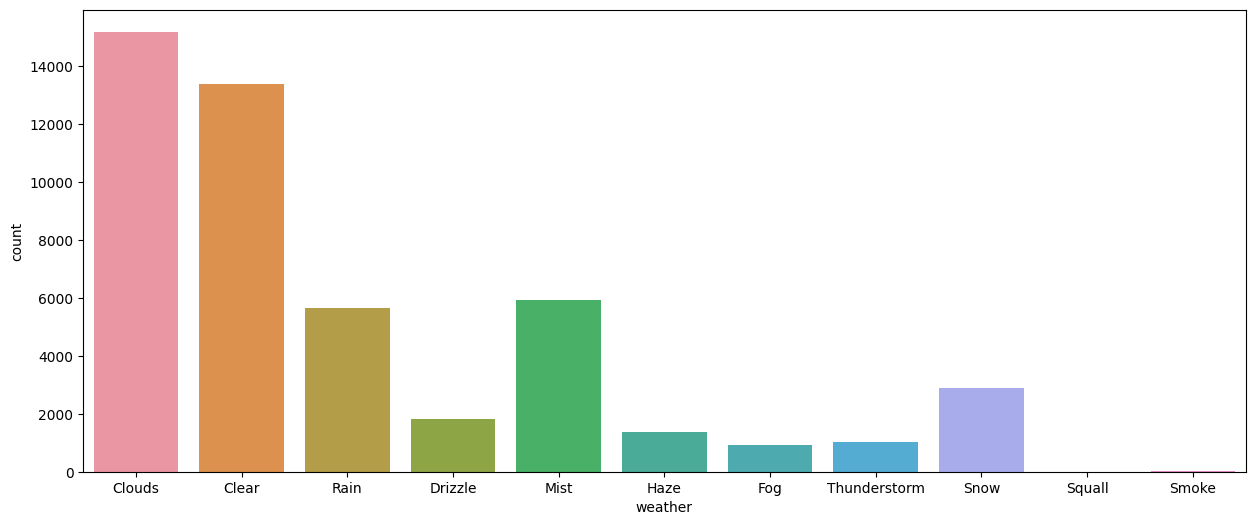

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=data,x='weather')
plt.show()

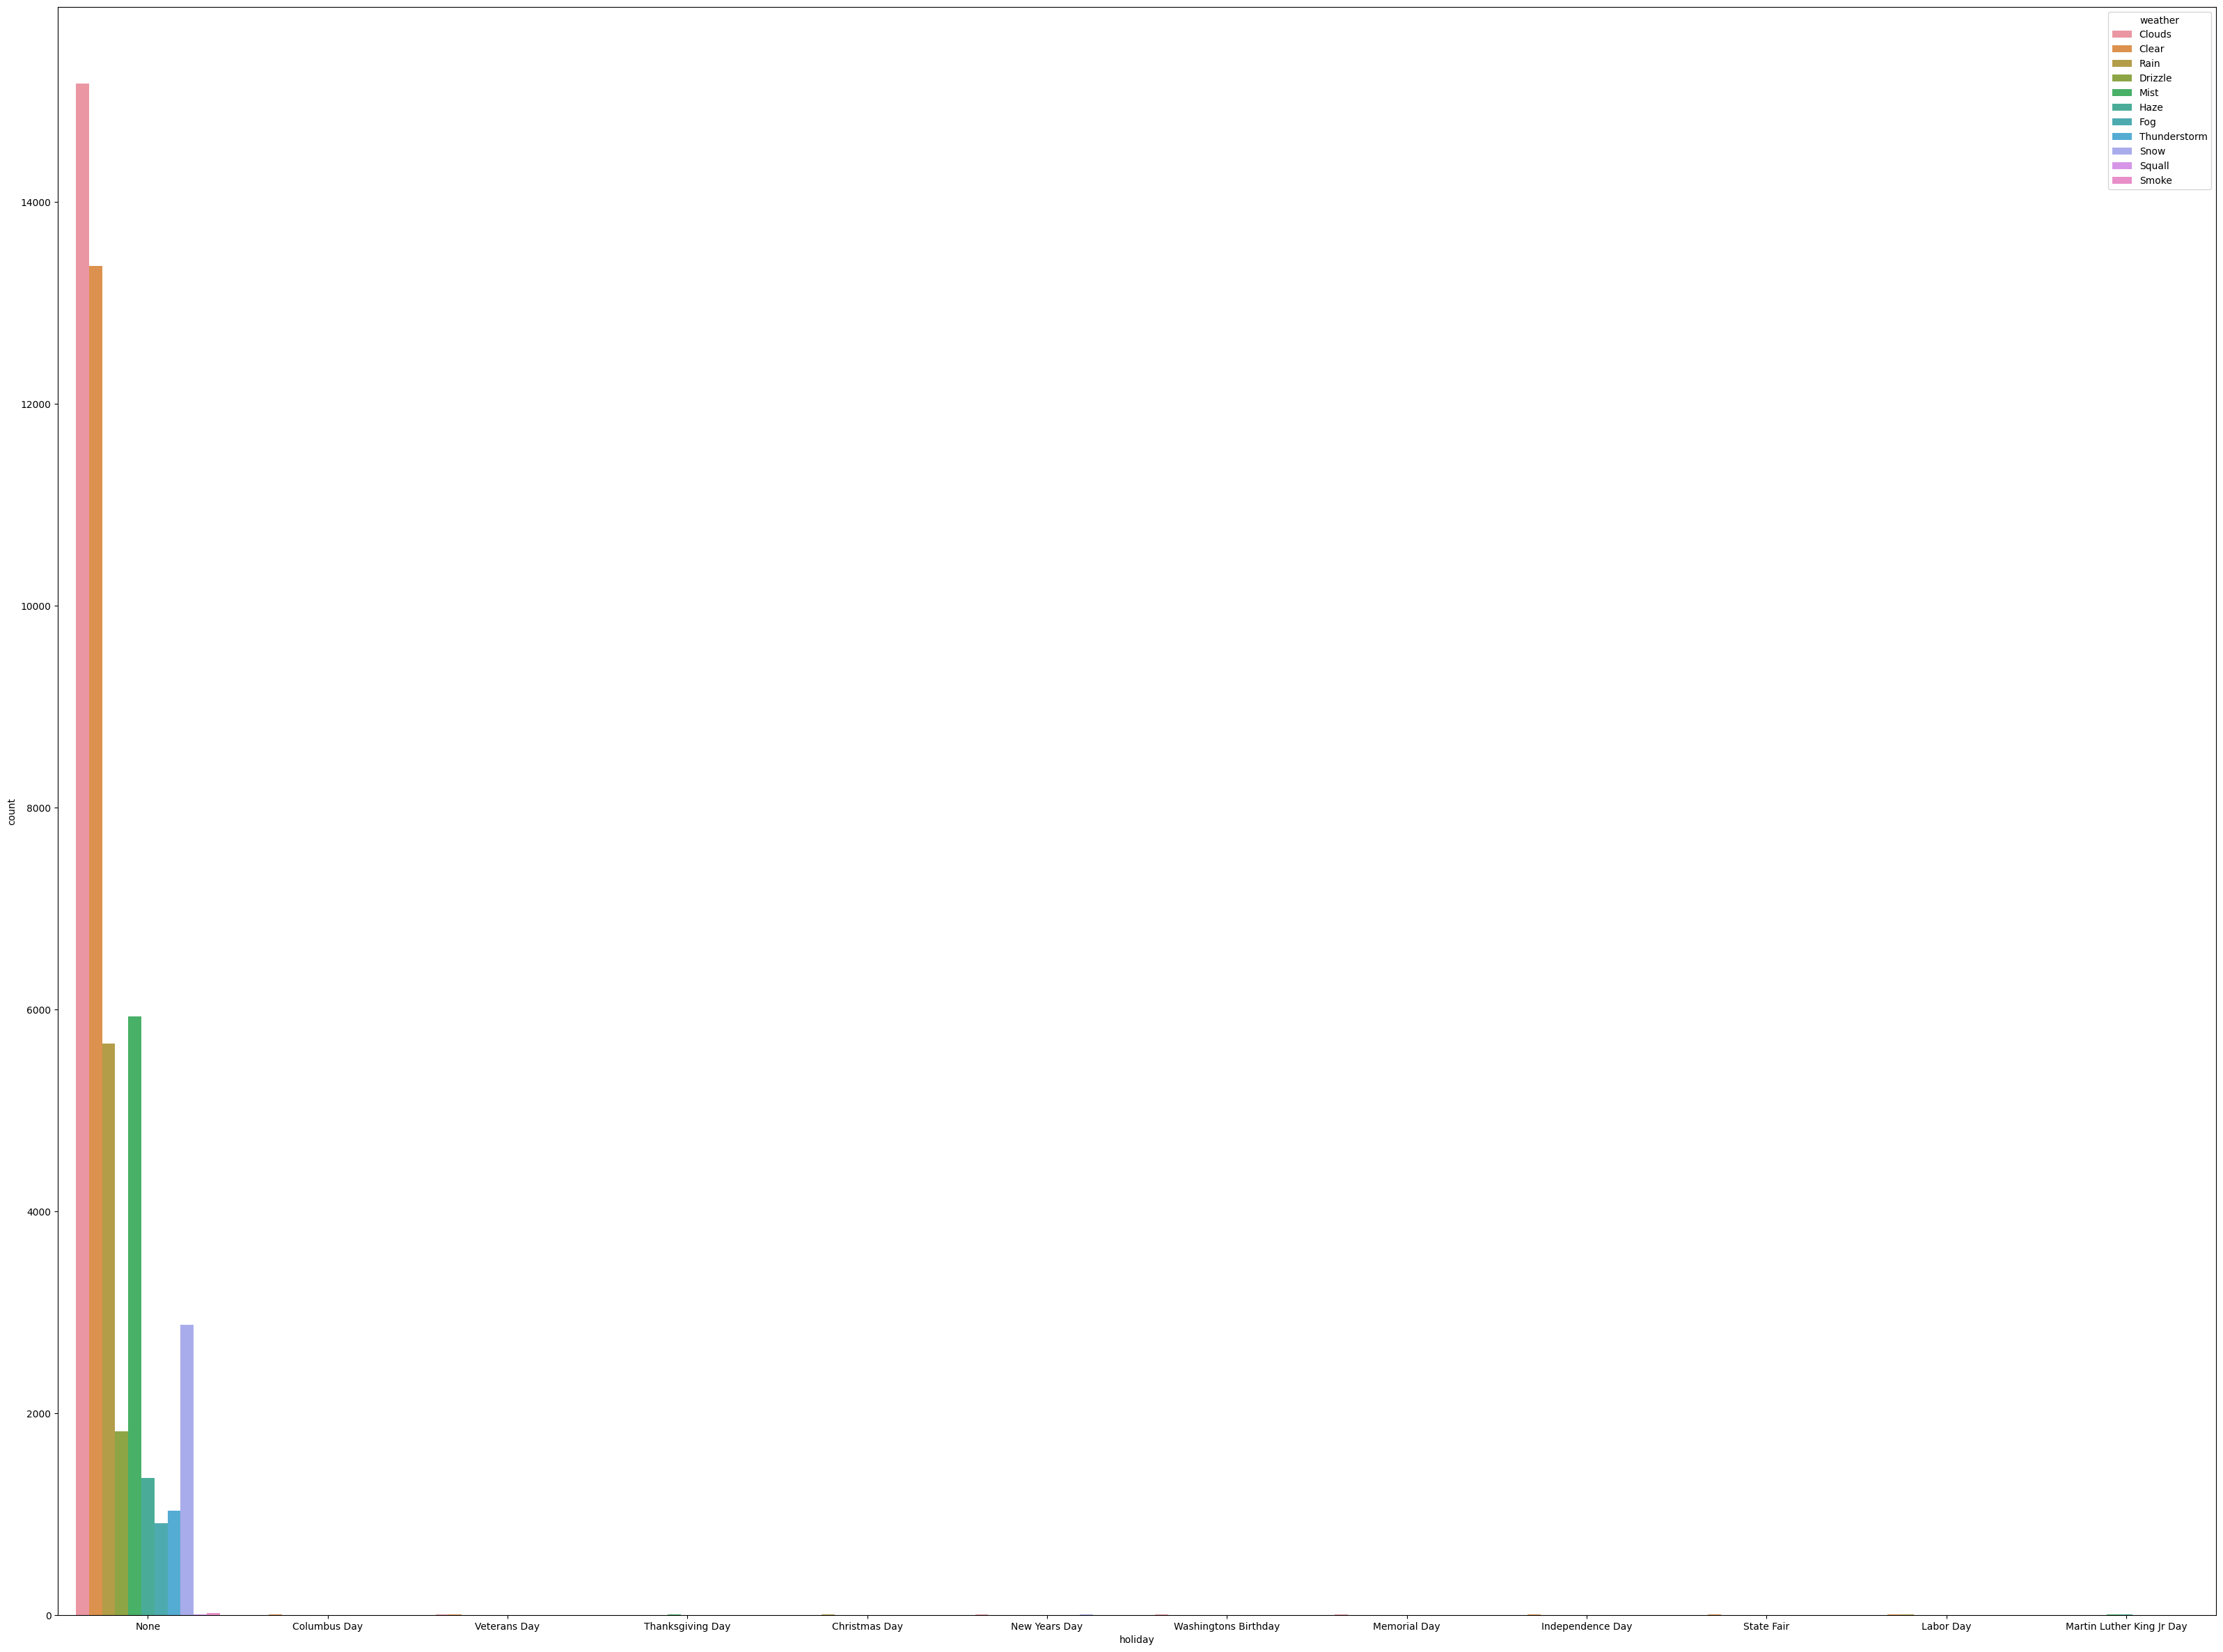

In [ ]:
plt.figure(figsize=(40,30))
sns.countplot(data=data,x='holiday',hue='weather')
plt.show()

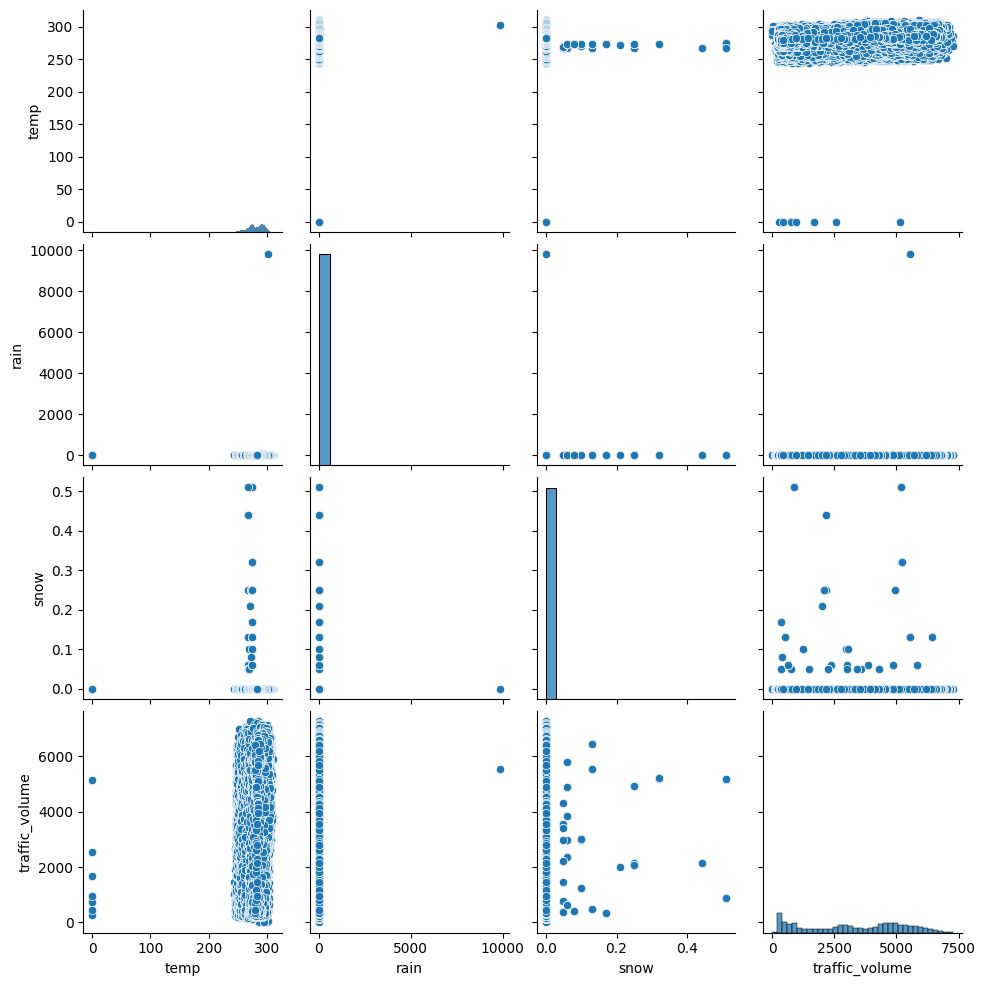

In [ ]:
sns.pairplot(data)

<Axes: >

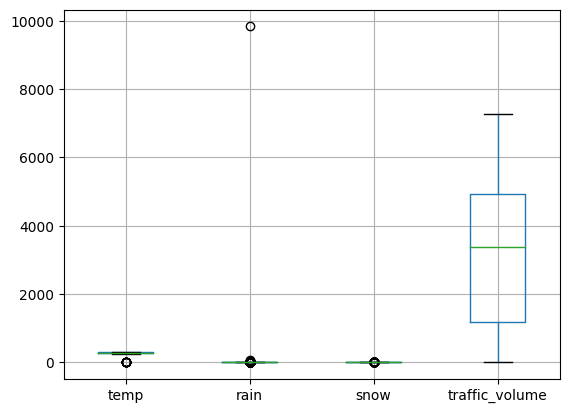

In [ ]:
data.boxplot()

In [ ]:
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)

In [ ]:
names=x.columns

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
print(x)

      holiday    temp  rain  snow       weather day month  year hours minutes  \
0        None  288.28   0.0   0.0        Clouds  02    10  2012    09      00   
1        None  289.36   0.0   0.0        Clouds  02    10  2012    10      00   
2        None  289.58   0.0   0.0        Clouds  02    10  2012    11      00   
3        None  290.13   0.0   0.0        Clouds  02    10  2012    12      00   
4        None  291.14   0.0   0.0        Clouds  02    10  2012    13      00   
...       ...     ...   ...   ...           ...  ..   ...   ...   ...     ...   
48199    None  283.45   0.0   0.0        Clouds  30    09  2018    19      00   
48200    None  282.76   0.0   0.0        Clouds  30    09  2018    20      00   
48201    None  282.73   0.0   0.0  Thunderstorm  30    09  2018    21      00   
48202    None  282.09   0.0   0.0        Clouds  30    09  2018    22      00   
48203    None  282.12   0.0   0.0        Clouds  30    09  2018    23      00   

      seconds  
0          

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.weather=le.fit_transform(x.weather)
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,1,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,1,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,1,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,1,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,1,02,10,2012,13,00,00


In [ ]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.holiday=le.fit_transform(x.holiday)
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,02,10,2012,13,00,00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [ ]:
x_scaled

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.636364,0.929726,0.0,0.0,0.1,0.033333,0.818182,0.0,0.391304,0.0,0.0
1,0.636364,0.933209,0.0,0.0,0.1,0.033333,0.818182,0.0,0.434783,0.0,0.0
2,0.636364,0.933918,0.0,0.0,0.1,0.033333,0.818182,0.0,0.478261,0.0,0.0
3,0.636364,0.935692,0.0,0.0,0.1,0.033333,0.818182,0.0,0.521739,0.0,0.0
4,0.636364,0.938949,0.0,0.0,0.1,0.033333,0.818182,0.0,0.565217,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
48199,0.636364,0.914148,0.0,0.0,0.1,0.966667,0.727273,1.0,0.826087,0.0,0.0
48200,0.636364,0.911923,0.0,0.0,0.1,0.966667,0.727273,1.0,0.869565,0.0,0.0
48201,0.636364,0.911826,0.0,0.0,1.0,0.966667,0.727273,1.0,0.913043,0.0,0.0
48202,0.636364,0.909762,0.0,0.0,0.1,0.966667,0.727273,1.0,0.956522,0.0,0.0


In [ ]:
x=pd.DataFrame(x,columns=names)

In [ ]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
y_test.value_counts().sum()

9641

Model Building

1. import the model building libraries

2. initializing the model

3. training and testing the model

4. evaluation of model

5. save the model

initialize the model

In [ ]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [ ]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()

fit the models with x_train and y_train

In [ ]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

predict the y_train values and calculate the accuracy

In [ ]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=XGB.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test,p1))
print(r2_score(y_test,p2))
print(r2_score(y_test,p3))
print(r2_score(y_test,p4))
print(r2_score(y_test,p5))

0.13579375538526683
0.6915446852835485
0.836986068276748
0.2476722982738807
0.8383734945924137


In [ ]:
p1=lin_reg.predict(x_train)
p2=Dtree.predict(x_train)
p3=Rand.predict(x_train)
p4=svr.predict(x_train)
p5=XGB.predict(x_train)

In [ ]:
print(r2_score(y_train,p1))
print(r2_score(y_train,p2))
print(r2_score(y_train,p3))
print(r2_score(y_train,p4))
print(r2_score(y_train,p5))

0.13302674351776855
1.0
0.9773725325111216
0.2439680961052091
0.8730284353140803


In [ ]:
p3=Rand.predict(x_test)

In [ ]:
MSE=metrics.mean_squared_error(y_test,p3)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,p3))

798.4415378143368

In [ ]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=XGB.predict(x_test)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,p1)))
print(np.sqrt(metrics.mean_squared_error(y_test,p2)))
print(np.sqrt(metrics.mean_squared_error(y_test,p3)))
print(np.sqrt(metrics.mean_squared_error(y_test,p4)))
print(np.sqrt(metrics.mean_squared_error(y_test,p5)))

1838.3976719006828
1098.3149371996183
798.4415378143368
1715.2770939066922
795.0364730595379


In [ ]:
import pickle

In [ ]:
pickle.dump(Rand,open("model.pkl",'wb'))

In [ ]:
model_loaded=pickle.load(open('/content/model.pkl','rb'))

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regressor=Ridge()

In [ ]:
parameters={"alpha":[1,2,3,5,10,20,30,40,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring="neg_mean_squared_error",cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 40, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 90}


In [ ]:
print(ridgecv.best_score_)

-3592928.6595078884


In [ ]:
y_pred=ridgecv.predict(x_test)

In [ ]:
y_pred

array([2774.06965377, 3835.24254725, 2412.9332864 , ..., 4342.26110001,
       2613.5691651 , 2006.3859475 ])

In [ ]:
y_test

44287    5875
2006     2868
6582      557
13779    4354
1721      783
         ... 
18938    2855
12883    6331
35157    3136
32593    2624
11025     624
Name: traffic_volume, Length: 9641, dtype: int64

In [ ]:
print(r2_score(y_test,y_pred))

0.13578863030664523


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassocv.best_params_)

{'alpha': 2}


In [ ]:
print(lassocv.best_score_)

-3432193.017781253


In [ ]:
y_pred_lasso=lassocv.predict(x_test)

In [ ]:
y_pred

array([2774.06965377, 3835.24254725, 2412.9332864 , ..., 4342.26110001,
       2613.5691651 , 2006.3859475 ])

In [ ]:
y_test

44287    5875
2006     2868
6582      557
13779    4354
1721      783
         ... 
18938    2855
12883    6331
35157    3136
32593    2624
11025     624
Name: traffic_volume, Length: 9641, dtype: int64

In [ ]:
y_predict_1=lassocv.predict(x_train)

In [ ]:
y_predict_1

array([3689.27414782, 1919.04951807, 2819.18409286, ..., 3503.60685054,
       2433.71425206, 2239.53211185])

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.r2_score(y_test,y_pred_lasso))

0.13575141193950002


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100,random_state=42)

In [ ]:
gb_regressor.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred=gb_regressor.predict(x_test)

In [ ]:
print(r2_score(y_test,y_pred))

0.7896585171652827


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
forest_params=[{'max_depth':list(range(10,15)),'max_features':list(range(0,14))}]

In [ ]:
RFC_cv=GridSearchCV(RFC,param_grid=forest_params,cv=10,scoring="accuracy")

In [ ]:
import pickle

In [ ]:
pickle.dump(Rand,open("scale.pkl",'wb'))

In [ ]:
model_loaded1=pickle.load(open('/content/scale.pkl','rb'))

In [ ]:
model_loaded1=pickle.load(open('/content/scale.pkl','rb'))